# Machine Learning Fundamentals - Lecture 03

This is the Jupyter notebook for Lecture 03 of the Machine Learning Fundamentals
course.

In [203]:
# Import the required libraries using the commonly use short names (pd, sns, ...)
import numpy as np
import pandas as pd
import seaborn as sns

# The Path object from pathlib allows us to easily build paths in an
# OS-independent fashion
from pathlib import Path

# Load the required scikit-learn classes and functions
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from scipy import stats

# Set a nicer style for Seaborn plots
sns.set_style("darkgrid")

## Part 1: load and clean the Pokémon dataset

Here we just repeat the steps already done in the previous lectures, but in a
more succint way.

In [204]:
# Load the dataset (note the use of the Path object)
df = pd.read_csv(Path("Pokemon.csv"))

# It's not good practice to have column names with spaces and other non-standard
# characters, so let's fix this by renaming the columns to standard names
df.rename(columns={
    "Type 1" : "Type1",
    "Type 2" : "Type2",
    "Sp. Atk" : "SpAtk",
    "Sp. Def" : "SpDef",
}, inplace=True)

# Replace missing values in the "Type2" column with the string "None"
df["Type2"] = df["Type2"].fillna("None")

# Since primary and secondary types are essentially categories (and not just
# strings / objects), we can convert these columns to the category type
df["Type1"] = df["Type1"].astype("category")
df["Type2"] = df["Type2"].astype("category")

Before we proceed to the interesting part, we'll perform our data scaling and
train/test data splitting.

In [205]:
# Select feature and target
X = df[["Attack"]]
y = df["Total"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Mini Project 4: Implement Linear Regression

In [ ]:
# -------------------------------------------
# Linear Regression 1D Implementation
# -------------------------------------------

def linearRegression1D(X, y):
    """
    Perform simple linear regression on 1D data. Using Ordinary Least Squares (OLS). 
    The linear model is y = a*x + b, where a is the slope and b is the intercept.
    """
    # Convert to numpy arrays and flatten to 1D arrays
    x = np.asarray(X).ravel()
    y = np.asarray(y).ravel()
    
    # Compute means of x and y
    mx = x.mean()
    my = y.mean()
    
    # Compute slope (a) and intercept (b) of the regression line
    a = np.sum((x - mx)*(y - my)) / np.sum((x - mx)**2)
    b = my - a*mx
    
    # Return the parameters
    return a, b

def predict(X, a, b):
    """
    Predict using the linear regression parameters. Using the model y = a*x + b.
    """
    # Predict y values using the linear model y = a*x + b
    y_pred = a * X + b
    return y_pred

def r2(X, y, a, b):
    """
    Compute the R2 score for the linear regression model. Using the formula:
    R2 = 1 - (SS_res / SS_tot)
    where SS_res is the sum of squares of residuals and SS_tot is the total sum of squares.
    0 <= R2 <= 1, with 1 being a perfect fit.
    """
    # Convert to numpy arrays and flatten to 1D arrays
    x = np.asarray(X).ravel()
    y = np.asarray(y).ravel()
    
    # Compute mean of y
    my = y.mean()
    
    # Compute R2 score
    r2 = 1 - (np.sum((y - predict(x, a, b))**2) / np.sum((y - my)**2))

    return r2


# -------------------------------------------
# Linear Regression Multi-Dimensional Implementation
# -------------------------------------------



Mean Absolute Error: 61.7980
Mean Absolute Percentage Error: 0.1477
R2 (sklearn): 0.5680
Mean Absolute Error (manual): 61.7980
Mean Absolute Percentage Error (manual): 0.1477
R2 (manual): 0.5680


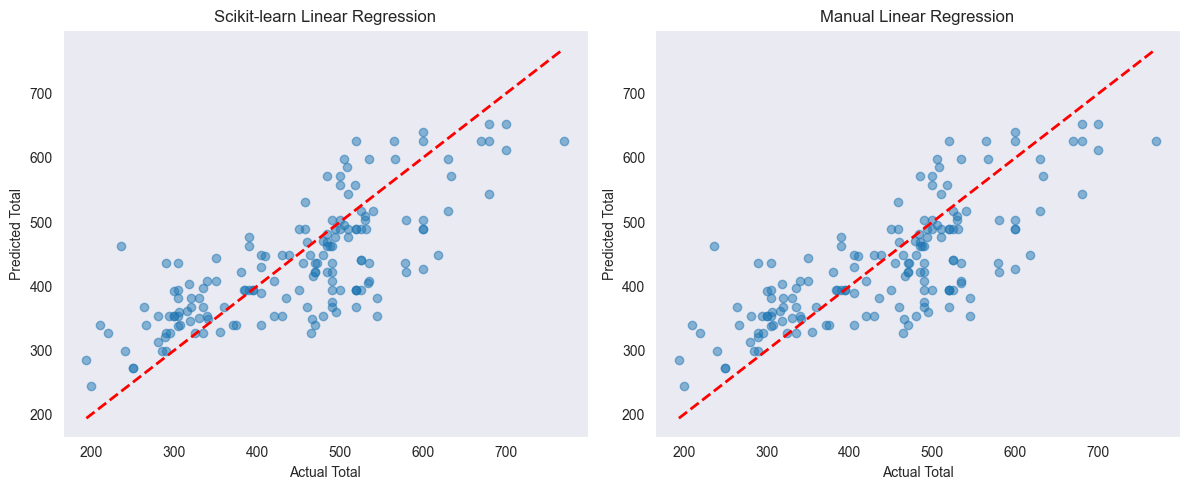

In [207]:
# -------------------------------------------
# Sklearn implementation
# -------------------------------------------

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics mean absolute error and mean absolute percentage error
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4f}")

# R2 score
r2_sklearn = model.score(X_test, y_test)
print (f"R2 (sklearn): {r2_sklearn:.4f}")


# -------------------------------------------
# Manual implementation
# -------------------------------------------

# Train linear regression
a, b = linearRegression1D(X_train, y_train)

# Predict
y_pred_manual = predict(X_test, a, b)

# Metrics mean absolute error and mean absolute percentage error
mae_manual = mean_absolute_error(y_test, y_pred_manual)
mape_manual = mean_absolute_percentage_error(y_test, y_pred_manual)

print(f"Mean Absolute Error (manual): {mae_manual:.4f}")
print(f"Mean Absolute Percentage Error (manual): {mape_manual:.4f}")

# R2 score
r2 = r2(X_test, y_test, a, b)
print (f"R2 (manual): {r2:.4f}")


# --------------------------------------------
# Plot results
# --------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scikit-learn implementation
axes[0].scatter(y_test, y_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linestyle='--', linewidth=2)
axes[0].set_title("Scikit-learn Linear Regression")
axes[0].set_xlabel("Actual Total")
axes[0].set_ylabel("Predicted Total")
axes[0].grid()

# Manual implementation
axes[1].scatter(y_test, y_pred_manual, alpha=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linestyle='--', linewidth=2)
axes[1].set_title("Manual Linear Regression")
axes[1].set_xlabel("Actual Total")
axes[1].set_ylabel("Predicted Total")
axes[1].grid()

plt.tight_layout()
plt.show()

In [208]:
# Multi-dimensional case
X = df[["Attack", "Defense"]]
y = df["Total"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# -------------------------------------------
# Sklearn multi-dimensional implementation
# -------------------------------------------

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --------------------------------------------
# Plot results
# --------------------------------------------
